# 🏢 TechNova Solutions — Employee Attrition Prediction
 TechNova_Attrition_Prediction_c0949651

**Presenter:** Manpreet Kaur

This notebook presents an end-to-end implementation of an Employee Attrition Prediction model for TechNova Solutions.

## 📘 Context
TechNova Solutions, a mid-sized IT services company, has been facing a high attrition rate compared to industry standards. This notebook explores employee attrition factors and develops a machine learning model to predict which employees are likely to leave.

## 🎯 Problem Statement
To analyze employee data, identify patterns that contribute to attrition, and develop a predictive model to help HR proactively retain talent.

## 🧩 Objective
- Understand employee demographics, work environment, and satisfaction metrics.
- Preprocess and analyze the dataset.
- Train and evaluate predictive models.
- Provide actionable HR insights and strategies based on model outcomes.

## 📊 Data Understanding
Load and explore the dataset to understand its structure, attributes, and data types.

**Findings/Observations:**
- 

In [8]:
# Import important Python libraries
import pandas as pd 
import numpy as np   

# Load the dataset
df = pd.read_csv(r"C:\Users\Manpreet Kaur\OneDrive\Documents\sem 3\Software tools\employee_churn_dataset.csv")

# Show first 5 rows to understand what data looks like
df.head()

df.info()

df.isnull().sum()

# Show summary statistics for numbers 
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employee ID                   10000 non-null  object 
 1   Age                           10000 non-null  int64  
 2   Gender                        10000 non-null  object 
 3   Education Level               10000 non-null  object 
 4   Marital Status                10000 non-null  object 
 5   Tenure                        10000 non-null  int64  
 6   Job Role                      10000 non-null  object 
 7   Department                    10000 non-null  object 
 8   Salary                        10000 non-null  int64  
 9   Work Location                 10000 non-null  object 
 10  Performance Rating            10000 non-null  int64  
 11  Projects Completed            10000 non-null  int64  
 12  Training Hours                10000 non-null  int64  
 13  Pr

,Age,Tenure,Salary,Performance Rating,Projects Completed,Training Hours,Promotions,Overtime Hours,Satisfaction Level,Average Monthly Hours Worked,Absenteeism,Distance from Home,Manager Feedback Score,Churn
count,10000.000000,10000.000000,10000.0000,10000.0000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,40.561200,6.976800,89772.7548,3.0275,24.501200,49.715500,0.101000,24.2506,0.494940,224.53820,9.467700,24.491800,5.565430,0.202800
std,10.876483,4.296988,34469.8058,1.4120,14.444461,28.930822,0.301344,14.4787,0.287771,43.62834,5.758635,14.512491,2.595523,0.402105
min,22.000000,0.000000,30010.0000,1.0000,0.000000,0.000000,0.000000,0.0000,0.000000,150.00000,0.000000,0.000000,1.000000,0.000000
25%,31.000000,3.000000,59718.5000,2.0000,12.000000,24.750000,0.000000,12.0000,0.247500,186.00000,4.000000,12.000000,3.300000,0.000000
50%,41.000000,7.000000,89243.0000,3.0000,24.000000,49.000000,0.000000,24.0000,0.490000,225.00000,9.000000,24.000000,5.600000,0.000000
75%,50.000000,11.000000,119725.5000,4.0000,37.000000,75.000000,0.000000,37.0000,0.740000,262.25000,14.000000,37.000000,7.800000,0.000000
max,59.000000,14.000000,149993.0000,5.0000,49.000000,99.000000,1.000000,49.0000,1.000000,299.00000,19.000000,49.000000,10.000000,1.000000


## 🧼 Data Preprocessing
Handle missing values, duplicates, and data inconsistencies. Encode categorical variables and scale numerical ones as needed.

**Findings/Observations:**

In [9]:
df.isnull().sum()

Employee ID                     0
Age                             0
Gender                          0
Education Level                 0
Marital Status                  0
Tenure                          0
Job Role                        0
Department                      0
Salary                          0
Work Location                   0
Performance Rating              0
Projects Completed              0
Training Hours                  0
Promotions                      0
Overtime Hours                  0
Satisfaction Level              0
Work-Life Balance               0
Average Monthly Hours Worked    0
Absenteeism                     0
Distance from Home              0
Manager Feedback Score          0
Churn                           0
dtype: int64

In [10]:
df = df.drop(columns=['Employee ID'])

In [11]:
# Basic statistics
df.describe()

,Age,Tenure,Salary,Performance Rating,Projects Completed,Training Hours,Promotions,Overtime Hours,Satisfaction Level,Average Monthly Hours Worked,Absenteeism,Distance from Home,Manager Feedback Score,Churn
count,10000.000000,10000.000000,10000.0000,10000.0000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,40.561200,6.976800,89772.7548,3.0275,24.501200,49.715500,0.101000,24.2506,0.494940,224.53820,9.467700,24.491800,5.565430,0.202800
std,10.876483,4.296988,34469.8058,1.4120,14.444461,28.930822,0.301344,14.4787,0.287771,43.62834,5.758635,14.512491,2.595523,0.402105
min,22.000000,0.000000,30010.0000,1.0000,0.000000,0.000000,0.000000,0.0000,0.000000,150.00000,0.000000,0.000000,1.000000,0.000000
25%,31.000000,3.000000,59718.5000,2.0000,12.000000,24.750000,0.000000,12.0000,0.247500,186.00000,4.000000,12.000000,3.300000,0.000000
50%,41.000000,7.000000,89243.0000,3.0000,24.000000,49.000000,0.000000,24.0000,0.490000,225.00000,9.000000,24.000000,5.600000,0.000000
75%,50.000000,11.000000,119725.5000,4.0000,37.000000,75.000000,0.000000,37.0000,0.740000,262.25000,14.000000,37.000000,7.800000,0.000000
max,59.000000,14.000000,149993.0000,5.0000,49.000000,99.000000,1.000000,49.0000,1.000000,299.00000,19.000000,49.000000,10.000000,1.000000


In [12]:
# Count of employees who stayed or left
df['Churn'].value_counts()

Churn
0    7972
1    2028
Name: count, dtype: int64

In [13]:
# Percentage
df['Churn'].value_counts(normalize=True) * 100


Churn
0    79.72
1    20.28
Name: proportion, dtype: float64

## 🔍 Exploratory Data Analysis (EDA)
Perform detailed EDA to uncover trends, relationships, and distributions across features.

**Visualizations:** Histograms, boxplots, correlation heatmaps, etc.

**Findings/Observations:**
- 

🔹 Basic Statistics:


,Age,Tenure,Salary,Performance Rating,Projects Completed,Training Hours,Promotions,Overtime Hours,Satisfaction Level,Average Monthly Hours Worked,Absenteeism,Distance from Home,Manager Feedback Score,Churn
count,10000.000000,10000.000000,10000.0000,10000.0000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,40.561200,6.976800,89772.7548,3.0275,24.501200,49.715500,0.101000,24.2506,0.494940,224.53820,9.467700,24.491800,5.565430,0.202800
std,10.876483,4.296988,34469.8058,1.4120,14.444461,28.930822,0.301344,14.4787,0.287771,43.62834,5.758635,14.512491,2.595523,0.402105
min,22.000000,0.000000,30010.0000,1.0000,0.000000,0.000000,0.000000,0.0000,0.000000,150.00000,0.000000,0.000000,1.000000,0.000000
25%,31.000000,3.000000,59718.5000,2.0000,12.000000,24.750000,0.000000,12.0000,0.247500,186.00000,4.000000,12.000000,3.300000,0.000000
50%,41.000000,7.000000,89243.0000,3.0000,24.000000,49.000000,0.000000,24.0000,0.490000,225.00000,9.000000,24.000000,5.600000,0.000000
75%,50.000000,11.000000,119725.5000,4.0000,37.000000,75.000000,0.000000,37.0000,0.740000,262.25000,14.000000,37.000000,7.800000,0.000000
max,59.000000,14.000000,149993.0000,5.0000,49.000000,99.000000,1.000000,49.0000,1.000000,299.00000,19.000000,49.000000,10.000000,1.000000



🔹 Churn Value Counts:
Churn
0    7972
1    2028
Name: count, dtype: int64

🔹 Churn Percentage:
Churn
0    79.72
1    20.28
Name: proportion, dtype: float64


C:\Users\Manpreet Kaur\AppData\Local\Temp\ipykernel_3976\2125163823.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='pastel')


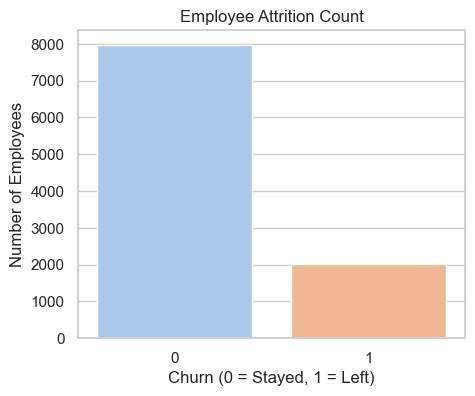

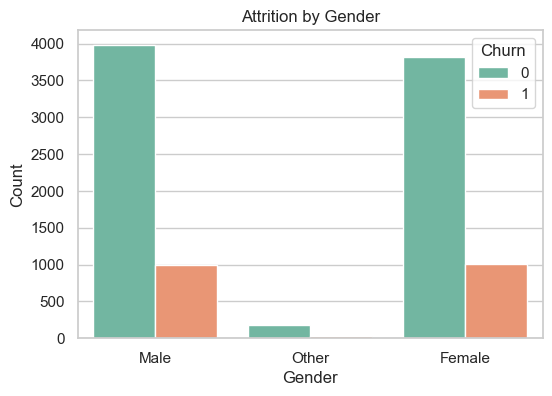

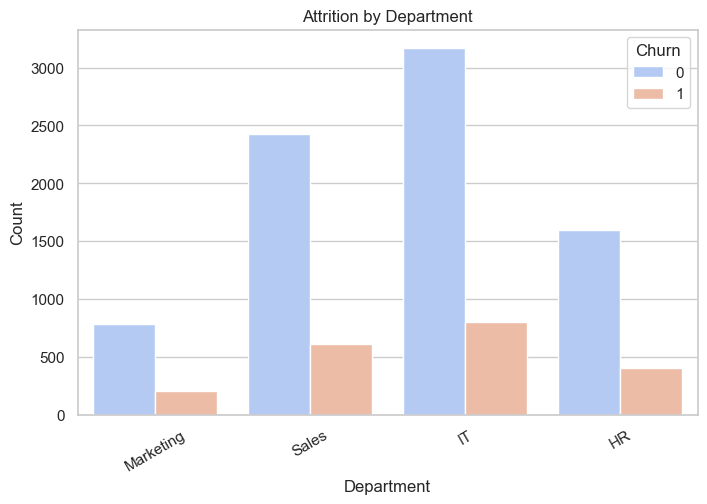

C:\Users\Manpreet Kaur\AppData\Local\Temp\ipykernel_3976\2125163823.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Salary', data=df, palette='husl')


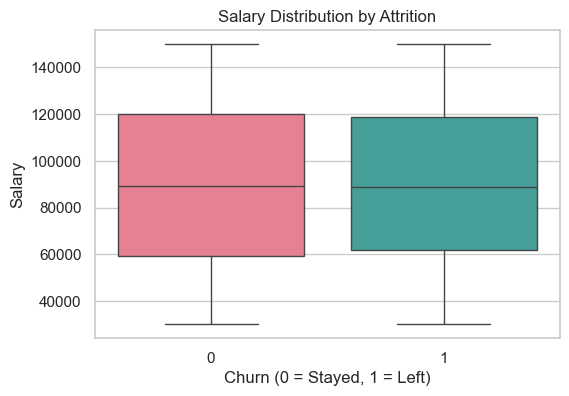

ValueError: could not convert string to float: 'Male'

<Figure size 1200x800 with 0 Axes>

In [14]:
# -------------------------------
# 🧠 Exploratory Data Analysis (EDA)
# -------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# 4.1 Basic Statistics
print("🔹 Basic Statistics:")
display(df.describe())

# 4.2 Check Target Column - Churn
print("\n🔹 Churn Value Counts:")
print(df['Churn'].value_counts())

print("\n🔹 Churn Percentage:")
print(df['Churn'].value_counts(normalize=True) * 100)

# 4.3 Visualize Attrition Count
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title('Employee Attrition Count')
plt.xlabel('Churn (0 = Stayed, 1 = Left)')
plt.ylabel('Number of Employees')
plt.show()

# 4.4 Attrition by Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Churn', data=df, palette='Set2')
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 4.5 Attrition by Department
plt.figure(figsize=(8,5))
sns.countplot(x='Department', hue='Churn', data=df, palette='coolwarm')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

# 4.6 Salary vs Attrition
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='Salary', data=df, palette='husl')
plt.title('Salary Distribution by Attrition')
plt.xlabel('Churn (0 = Stayed, 1 = Left)')
plt.ylabel('Salary')
plt.show()

# 4.7 Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()




## 🧼 Data Preprocessing ( Again)

In [ ]:
# -------------------------------
# ⚙️Data Preprocessing (Fixed)
# -------------------------------

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1️⃣ Drop the Employee ID column if still present
if 'Employee ID' in df.columns:
    df = df.drop(columns=['Employee ID'])
    print("✅ Dropped 'Employee ID' column")

# 2️⃣ Encode 'Gender' (since it's still text)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
print("✅ Encoded 'Gender' column")

# 3️⃣ Prepare data for scaling and splitting
X = df.drop('Churn', axis=1)
y = df['Churn']

# 4️⃣ Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5️⃣ Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("\n✅ Data Preprocessing Completed Successfully!")
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)



✅ Encoded 'Gender' column

✅ Data Preprocessing Completed Successfully!
Training Set Shape: (8000, 26)
Testing Set Shape: (2000, 26)


## 🧠 Feature Engineering
Create or modify features to improve model performance and interpretability.

**Examples:** Derived ratios, tenure buckets, or aggregated satisfaction scores.

**Findings/Observations:**
- 

🔍 Top correlated features with 'Churn':

Churn                 1.000000
Projects Completed    0.012097
Tenure                0.011000
Education Level       0.010414
Work Location_1       0.008063
Marital Status_2      0.007831
Training Hours        0.007694
Performance Rating    0.007439
Job Role_1            0.007195
Work-Life Balance     0.005043
Name: Churn, dtype: float64


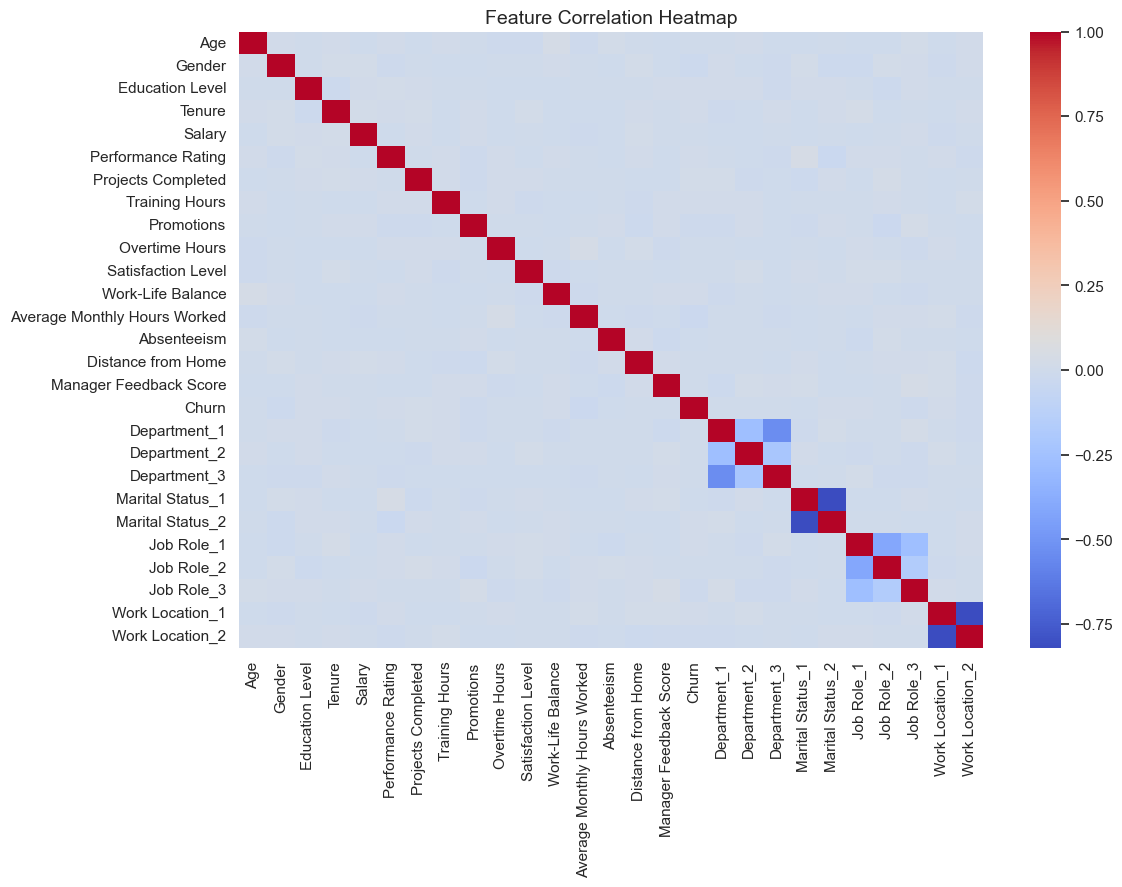


✅ No highly correlated features found to drop.

✅ Feature Engineering Completed!
New Dataset Shape: (10000, 27)


In [ ]:
# -------------------------------
# Feature Engineering
# -------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert scaled data back to DataFrame 
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 1️⃣ Check correlation with target variable 
correlations = df.corr(numeric_only=True)['Churn'].sort_values(ascending=False)
print("🔍 Top correlated features with 'Churn':\n")
print(correlations.head(10))

# 2️⃣ Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

# 3️⃣ Optional: Drop highly correlated features 
corr_matrix = df.corr(numeric_only=True).abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

if to_drop:
    print("\n⚠️ Dropping highly correlated features:", to_drop)
    X_scaled_df.drop(columns=to_drop, inplace=True)
else:
    print("\n✅ No highly correlated features found to drop.")

# 4️⃣ Example of a new derived feature :
X_scaled_df['Engagement_Level'] = (
    df['Satisfaction Level'] * df['Work-Life Balance'] * df['Manager Feedback Score']
)

print("\n✅ Feature Engineering Completed!")
print("New Dataset Shape:", X_scaled_df.shape)


## ⚙️ Experiment Design
Plan model experiments, define baseline models, and choose evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

**Findings/Observations:**
- 

In [ ]:
# -----------------------------------------
# ⚙️ Experiment Design
# -----------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1️⃣ Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# 2️⃣ Define a simple baseline model 
baseline_model = LogisticRegression(max_iter=1000, random_state=42)

# 3️⃣ Train the model
baseline_model.fit(X_train, y_train)

# 4️⃣ Make predictions
y_pred = baseline_model.predict(X_test)
y_prob = baseline_model.predict_proba(X_test)[:, 1]

# 5️⃣ Evaluate performance using multiple metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# 6️⃣ Display metrics
print("📊 Baseline Model Performance (Logistic Regression)")
print("---------------------------------------------------")
print(f"✅ Accuracy: {accuracy:.3f}")
print(f"✅ Precision: {precision:.3f}")
print(f"✅ Recall: {recall:.3f}")
print(f"✅ F1-Score: {f1:.3f}")
print(f"✅ ROC-AUC: {roc_auc:.3f}")


📊 Baseline Model Performance (Logistic Regression)
---------------------------------------------------
✅ Accuracy: 0.802
✅ Precision: 0.000
✅ Recall: 0.000
✅ F1-Score: 0.000
✅ ROC-AUC: 0.515


c:\Users\Manpreet Kaur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 🧩 Data Preparation
Split the dataset into training and testing sets and prepare data for model training.

**Findings/Observations:**
- 

In [ ]:
# -----------------------------------------
# 🧩 Data Preparation
# -----------------------------------------

from sklearn.model_selection import train_test_split

# ✅ Define feature set (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# ✅ Split the dataset into Training and Testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Check the shape of each dataset
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)
print("✅ Data successfully split for modeling.")


Training Data Shape: (8000, 26)
Testing Data Shape: (2000, 26)
✅ Data successfully split for modeling.


## 🤖 Data Modelling
Build and train classification models (e.g., Logistic Regression, Random Forest, XGBoost) to predict employee attrition.

**Findings/Observations:**
- 

## 📈 Model Evaluation
Compare models based on performance metrics and visualize results using confusion matrices, ROC curves, etc.

**Findings/Observations:**
- 

c:\Users\Manpreet Kaur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manpreet Kaur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manpreet Kaur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manpreet Kaur\a


📊 LogisticRegression performance
------------------------------
 accuracy: 0.802
precision: 0.000
   recall: 0.000
       f1: 0.000
  roc_auc: 0.515

Classification report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1604
           1       0.00      0.00      0.00       396

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.64      0.80      0.71      2000

Confusion matrix:
 [[1604    0]
 [ 396    0]]


c:\Users\Manpreet Kaur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manpreet Kaur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manpreet Kaur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manpreet Kaur\a


📊 RandomForest performance
------------------------------
 accuracy: 0.802
precision: 0.000
   recall: 0.000
       f1: 0.000
  roc_auc: 0.477

Classification report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1604
           1       0.00      0.00      0.00       396

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.64      0.80      0.71      2000

Confusion matrix:
 [[1604    0]
 [ 396    0]]

✅ Best model by ROC-AUC: LogisticRegression (0.515)


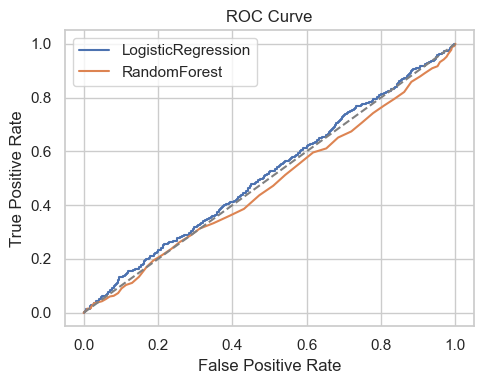

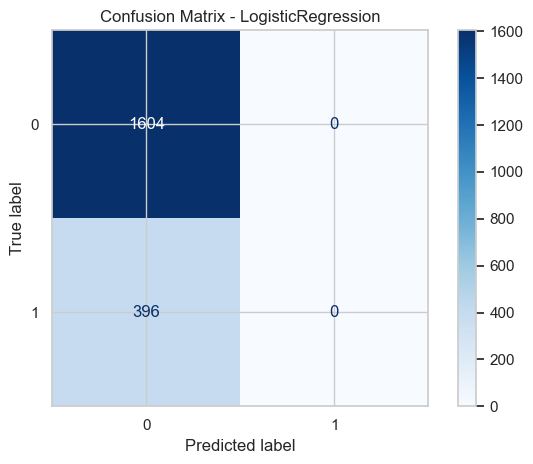


🔥 Top features (LogisticRegression by |coef|):


Average Monthly Hours Worked    0.076645
Gender                          0.064318
Work Location_2                 0.059473
Marital Status_2                0.031002
Work Location_1                 0.029434
Marital Status_1                0.028781
Projects Completed              0.026925
Department_3                    0.025825
Job Role_3                      0.020773
Work-Life Balance               0.020233
Department_1                    0.018883
Promotions                      0.018624
Job Role_1                      0.018046
Job Role_2                      0.016712
Tenure                          0.015899
dtype: float64


💾 Saved best model to: technova_outputs\TechNova_best_model_LogisticRegression.joblib
💾 Saved top features to: technova_outputs\top_features_LogisticRegression.csv
💾 Saved top-20 risk list to: technova_outputs\top20_risk_list.csv


In [ ]:
# -----------------------------------------
# 🤖 Modeling + Evaluation 
# Trains two easy models, compares them, plots results, and saves the best.
# -----------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)
import joblib


if 'X_train' not in globals() or 'y_train' not in globals():
    X = df.drop('Churn', axis=1)
    y = df['Churn']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )


logreg = make_pipeline(StandardScaler(with_mean=False), 
                       LogisticRegression(max_iter=1000, random_state=42))
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

models = {
    "LogisticRegression": logreg,
    "RandomForest": rf
}

# TRAIN + EVALUATE =====
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
    }
    results[name] = metrics
    print(f"\n📊 {name} performance")
    print("-"*30)
    for k,v in metrics.items():
        print(f"{k:>9}: {v:.3f}")
    print("\nClassification report:")
    print(classification_report(y_test, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

#  PICK BEST BY ROC_AUC =====
best_name = max(results, key=lambda k: results[k]["roc_auc"])
best_model = models[best_name]
print(f"\n✅ Best model by ROC-AUC: {best_name} ({results[best_name]['roc_auc']:.3f})")

# PLOTS: ROC + Confusion Matrix =====
# ROC curve
plt.figure(figsize=(5,4))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

# Confusion matrix for best model
from sklearn.metrics import ConfusionMatrixDisplay
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix - {best_name}")
plt.tight_layout()
plt.show()


feature_info = None
if best_name == "RandomForest":
    importances = best_model.feature_importances_
    feature_info = pd.Series(importances, index=X_train.columns).sort_values(ascending=False).head(15)
    print("\n🔥 Top features (RandomForest):")
    display(feature_info)
elif best_name == "LogisticRegression":
    # get coef from the logistic step in the pipeline
    lr = best_model.named_steps['logisticregression']
    # For scaled pipeline, columns order is X_train.columns
    coef = lr.coef_[0]
    feature_info = pd.Series(coef, index=X_train.columns).abs().sort_values(ascending=False).head(15)
    print("\n🔥 Top features (LogisticRegression by |coef|):")
    display(feature_info)


OUT_DIR = Path("technova_outputs")
OUT_DIR.mkdir(exist_ok=True)

model_path = OUT_DIR / f"TechNova_best_model_{best_name}.joblib"
joblib.dump(best_model, model_path)
print("\n💾 Saved best model to:", model_path)


if feature_info is not None:
    feature_file = OUT_DIR / f"top_features_{best_name}.csv"
    feature_info.to_csv(feature_file, header=['importance_or_coef'])
    print("💾 Saved top features to:", feature_file)


if hasattr(best_model, "predict_proba"):
    risk = X_test.copy()
    risk["churn_proba"] = best_model.predict_proba(X_test)[:,1]
    risk["pred"] = y_pred_best
    risk = risk.sort_values("churn_proba", ascending=False).head(20)
    risk_path = OUT_DIR / "top20_risk_list.csv"
    risk.to_csv(risk_path, index=False)
    print("💾 Saved top-20 risk list to:", risk_path)


## 🧩 Model Explainability
Use feature importance plots or SHAP/LIME explanations to understand which factors influence predictions the most.

**Findings/Observations:**
- 

c:\Users\Manpreet Kaur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manpreet Kaur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manpreet Kaur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manpreet Kaur\a

📊 Model Performance on Test Set
--------------------------------
✅ Accuracy : 0.802
✅ Precision: 0.000
✅ Recall   : 0.000
✅ F1-Score : 0.000
✅ ROC-AUC  : 0.515

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1604
           1       0.00      0.00      0.00       396

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.64      0.80      0.71      2000



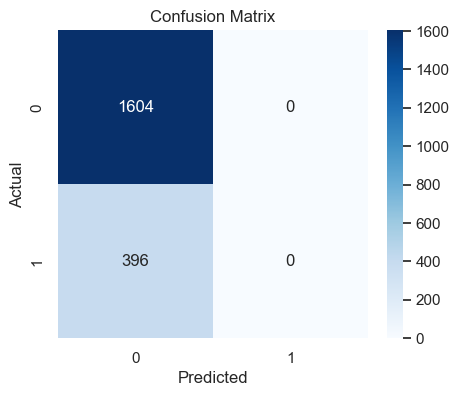

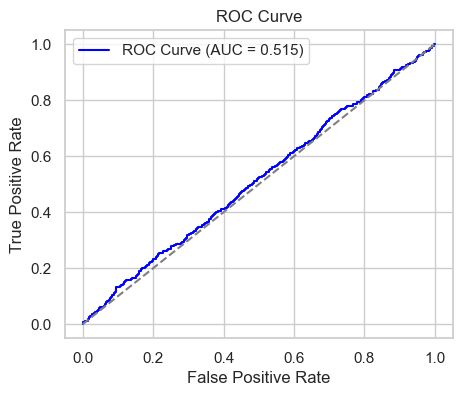

In [ ]:
# -----------------------------------------
# 📈 Model Evaluation
# -----------------------------------------

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Predict on test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# 2️⃣ Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("📊 Model Performance on Test Set")
print("--------------------------------")
print(f"✅ Accuracy : {accuracy:.3f}")
print(f"✅ Precision: {precision:.3f}")
print(f"✅ Recall   : {recall:.3f}")
print(f"✅ F1-Score : {f1:.3f}")
print(f"✅ ROC-AUC  : {roc_auc:.3f}")

# 3️⃣ Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 4️⃣ Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 5️⃣ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0,1],[0,1],'--',color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
